# OLS Analysis: Gender Wage Gap

This notebook analyzes the relationship between Hourly Wage and Gender using Ordinary Least Squares (OLS) regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)

## 1. Load Data

In [2]:
data_path = "../data/processed/Cleaned_ACS_2021.csv"
df = pd.read_csv(data_path)
print(f"Data shape: {df.shape}")
df.head()

/var/folders/l5/9tzh8xvn4c9bb2qc2r3pkqtc0000gn/T/ipykernel_11579/2332289163.py:2: DtypeWarning: Columns (15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Data shape: (501342, 52)


,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,YRNATUR,LANGUAGE,LANGUAGED,SPEAKENG,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,CLASSWKR,CLASSWKRD,OCCSOC,IND,WKSWORK1,UHRSWORK,INCTOT,INCWAGE,INCINVST,INCOTHER,INCEARN,TRANWORK,TRANTIME,DEPARTS,ARRIVES,IND Codes,Industry,Category,Sub Category_x,Main Category,Sub Category_y,2018 Onward ACS/PRCS,Occupation title,TOTAL_HOURS,HOURLY_WAGE
0,East South Central Div.,Alabama,48.0,0 children present,Male,20.0,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40.0,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909,7870,"Colleges, universities, and professional schoo...","Educational Services, and Health Care and Soci...",Educational Services,SERVICE OCCUPATIONS:,Personal Care and Service Occupations:,399041,Residential Advisors,2080.0,3.028846
1,East South Central Div.,Alabama,9.0,0 children present,Female,52.0,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,Regular high school diploma,NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",537051,6390,52,40.0,40600,40600,0,0,40600,"Auto, truck, or van",5,802,809,6390,Warehousing and storage,"Transportation and Warehousing, and Utilities ...","Transportation and Warehousing, and Utilities ...","PRODUCTION, TRANSPORTATION, AND MATERIAL MOVIN...",Material Moving Occupations:,537051,Industrial Truck and Tractor Operators,2080.0,19.519231
2,East South Central Div.,Alabama,46.0,0 children present,Female,18.0,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,State govt employee,412010,5391,52,41.0,6000,6000,0,0,6000,"Auto, truck, or van",25,532,559,5391,"General merchandise stores, including warehous...",Retail Trade,Retail Trade,SALES AND OFFICE OCCUPATIONS:,Sales and Related Occupations:,412010,Cashiers,2132.0,2.814259
3,East South Central Div.,Alabama,54.0,0 children present,Male,20.0,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40.0,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909,7870,"Colleges, universities, and professional schoo...","Educational Services, and Health Care and Soci...",Educational Services,SERVICE OCCUPATIONS:,Personal Care and Service Occupations:,399041,Residential Advisors,2080.0,3.028846
4,East South Central Div.,Alabama,42.0,0 children present,Female,18.0,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",352010,8680,52,35.0,26400,26400,0,0,26400,Walked only,3,1455,1459,8680,Restaurants and other food services,"Arts, Entertainment, and Recreation, and Accom...",Accommodation and Food Services,SERVICE OCCUPATIONS:,Food Preparation and Serving Related Occupations:,352010,Cooks,1820.0,14.505495


## 2. Preprocessing

We need to encode the `SEX` variable for regression analysis.

In [3]:
print(df['SEX'].value_counts())

# Create dummy variable: Female = 1 if SEX is 'Female', else 0
df['Female'] = (df['SEX'] == 'Female').astype(int)

print("\nEncoded 'Female' variable counts:")
print(df['Female'].value_counts())

SEX
Male      280420
Female    220922
Name: count, dtype: int64

Encoded 'Female' variable counts:
Female
0    280420
1    220922
Name: count, dtype: int64


## 3. Exploratory Data Analysis

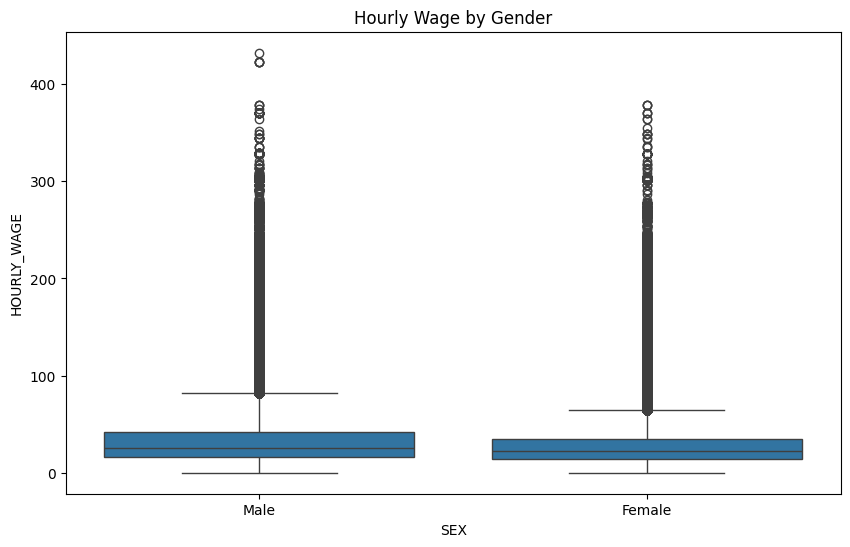

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='HOURLY_WAGE', data=df)
plt.title('Hourly Wage by Gender')
plt.show()

In [5]:
groupby_sex = df.groupby('SEX')['HOURLY_WAGE'].describe()
print(groupby_sex)

           count       mean        std  min        25%        50%        75%  \
SEX                                                                            
Female  220922.0  28.157637  25.714789  0.0  14.423077  22.115385  34.615385   
Male    280420.0  35.084886  36.330146  0.0  15.865385  25.480769  42.307692   

               max  
SEX                 
Female  378.365385  
Male    432.417582  


## 4. OLS Regression (Linear-Linear)

Model: `HOURLY_WAGE ~ Female`

In [6]:
# Run OLS
model = smf.ols("HOURLY_WAGE ~ Female", data=df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            HOURLY_WAGE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5759.
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:03:48   Log-Likelihood:            -2.4503e+06
No. Observations:              501342   AIC:                         4.901e+06
Df Residuals:                  501340   BIC:                         4.901e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0849      0.061    579.002      0.0

## 5. Log-Linear Regression (Percentage Interpretation)

To interpret the gender wage gap in percentages, we use a log-linear model.

Model: `log(HOURLY_WAGE) ~ Female`

The coefficient $\beta_{Female}$ represents the approximate percentage difference. The exact percentage difference is calculated as $(e^{\beta_{Female}} - 1) \times 100$.

In [7]:
# Filter for positive wages to avoid log(0) or log(negative)
df_log = df[df['HOURLY_WAGE'] > 0].copy()

# Create log wage variable
df_log['log_HOURLY_WAGE'] = np.log(df_log['HOURLY_WAGE'])

# Run Log-Linear OLS
log_model = smf.ols("log_HOURLY_WAGE ~ Female", data=df_log)
log_results = log_model.fit()

print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_HOURLY_WAGE   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7421.
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:03:48   Log-Likelihood:            -5.3590e+05
No. Observations:              481124   AIC:                         1.072e+06
Df Residuals:                  481122   BIC:                         1.072e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3071      0.001   2316.641      0.0

### Interpretation of Log-Linear Results

The coefficient for `Female` ($\beta$) is the difference in log wages. To convert this to a percentage difference, we use the formula:

$$ \% \Delta = (e^{\beta} - 1) \times 100 $$

**Why not just $\beta \times 100$?**
For small values of $\beta$ (e.g., < 0.1), $\beta \approx e^{\beta} - 1$, so multiplying by 100 is a good approximation. However, for larger gaps (like the one we observe), the approximation error grows, so the exact formula is preferred.

In [8]:
beta_female = log_results.params['Female']
percentage_diff = (np.exp(beta_female) - 1) * 100

print(f"Coefficient for Female (beta): {beta_female:.4f}")
print(f"Calculation: (e^({beta_female:.4f}) - 1) * 100 = {percentage_diff:.2f}%")
print(f"\nInterpretation: Controlling for nothing else, females earn approximately {abs(percentage_diff):.2f}% less than males.")

Coefficient for Female (beta): -0.1842
Calculation: (e^(-0.1842) - 1) * 100 = -16.82%

Interpretation: Controlling for nothing else, females earn approximately 16.82% less than males.
